In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
eyesdetector = cv2.CascadeClassifier("Train/third-party/frontalEyes35x16.xml")
mostdetector = cv2.CascadeClassifier("Train/third-party/Nose18x15.xml")

In [3]:

fullimg=cv2.imread("Test/Before.png")
fullimg=cv2.cvtColor(fullimg,cv2.COLOR_BGR2RGB)

In [4]:

overlay=cv2.imread("Train/glasses.png",cv2.IMREAD_UNCHANGED)
overlay=cv2.cvtColor(overlay,cv2.COLOR_BGRA2RGBA)

mostache=cv2.imread("Train/mustache.png",-1)
mostache=cv2.cvtColor(mostache,cv2.COLOR_BGRA2RGBA)


In [5]:
eyes=eyesdetector.detectMultiScale(fullimg,1.1,5)

In [6]:
eyes

array([[ 82, 111, 162,  74]], dtype=int32)

In [7]:
eyes

array([[ 82, 111, 162,  74]], dtype=int32)

In [8]:

x,y,w,h=eyes[0]

overlay=cv2.imread("Train/glasses.png",cv2.IMREAD_UNCHANGED)
overlay=cv2.cvtColor(overlay,cv2.COLOR_BGRA2RGBA)

overlay=cv2.resize(overlay,(w,h))

for i in range(overlay.shape[0]):
    for j in range(overlay.shape[1]):
        if(overlay[i,j,3]>0):
            fullimg[y+i,x+j,:]=overlay[i,j,:-1]

#     fullimg[y:y+w,x:x+h,:] = overlay[:,:,:]

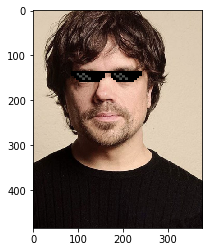

In [9]:
plt.imshow(fullimg)

In [30]:
mts=mostdetector.detectMultiScale(fullimg,1.5,5)

In [31]:
mts

array([[123, 168,  61,  51]], dtype=int32)

In [32]:

x,y,w,h=mts[0]

mostache=cv2.resize(mostache,(w,h))

for i in range(mostache.shape[0]):
    for j in range(mostache.shape[1]):
        if(mostache[i,j,3]>0):
            fullimg[y+i,x+j,:]=mostache[i,j,:-1]

# fullimg[y:y+w,x:x+h]=mostache[:,:,:]    

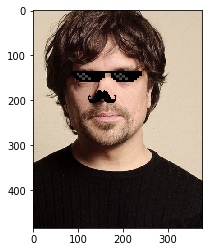

In [33]:
plt.imshow(fullimg)

In [34]:
fullimg.shape

(485, 377, 3)

In [35]:
fullimg = cv2.cvtColor(fullimg, cv2.COLOR_BGR2RGB)
cv2.imwrite("img.jpg", fullimg)

True

In [36]:
fullimg = fullimg.reshape((-1,3))

In [37]:
fullimg.shape

(182845, 3)

In [38]:
df = pd.DataFrame(fullimg, columns=["Channel 1","Channel 2", "Channel 3"]).to_csv("new_pred.csv", index=False)